In [9]:
import onnxruntime as rt
import numpy as np
import awkward as ak
from matplotlib import pyplot as plt
from coffea.util import load

from ml_pytorch.defaults.dnn_input_variables import  bkg_morphing_dnn_input_variables
from ml_pytorch.utils.tools import create_DNN_columns_list


In [19]:
input = "/work/tharte/datasets/data_samples/data_full_2022/merged/output_all.coffea"
input = "/work/mmalucch/out_hh4b/out_JMENanoData_comparisonRun2_DNN_variables_SR_CR_PADm10_fixed_SPANETptVary0p3_1p7_MorphingSoftmaxATheEndOversampling/output_all.coffea"

o = load(f"{input}")
sample=list(o["columns"].keys())[0]
dataset=list(o["columns"][sample].keys())[0]
category=list(o["columns"][sample][dataset].keys())[0]
category="2b_control_region_postWRun2"
# category="4b_control_regionRun2"
print(sample,dataset, category)
col=o["columns"][sample][dataset][category]


for k in col.keys():
    print(k)
    col[k]=col[k].value#[col[k].value!=-999]


DATA_JetMET_JMENano_skimmed DATA_JetMET_JMENano_2022_postEE_EraE 2b_control_region_postWRun2
weight
HiggsLeadingRun2_helicityCosTheta
HiggsLeadingRun2_phi
HiggsLeadingRun2_mass
HiggsLeadingRun2_pt
HiggsLeadingRun2_dR
HiggsLeadingRun2_eta
HiggsSubLeadingRun2_helicityCosTheta
HiggsSubLeadingRun2_phi
HiggsSubLeadingRun2_mass
HiggsSubLeadingRun2_pt
HiggsSubLeadingRun2_dR
HiggsSubLeadingRun2_eta
HHRun2_dPhi
HHRun2_Costhetastar_CS
HHRun2_mass
HHRun2_pt
HHRun2_dR
HHRun2_eta
HHRun2_dEta
JetGoodFromHiggsOrderedRun2_N
JetGoodFromHiggsOrderedRun2_pt
JetGoodFromHiggsOrderedRun2_phi
JetGoodFromHiggsOrderedRun2_eta
JetGoodFromHiggsOrderedRun2_mass
JetGoodFromHiggsOrderedRun2_btagPNetB
add_jet1ptRun2_pt
add_jet1ptRun2_phi
add_jet1ptRun2_eta
add_jet1ptRun2_mass
events_dR_max
events_dR_min
events_sigma_over_higgs2_reco_massRun2
events_era
events_sigma_over_higgs1_reco_massRun2
events_HT


In [20]:
list_variables=create_DNN_columns_list(True, bkg_morphing_dnn_input_variables)
print(list_variables)
list_column=[]
for k in list_variables:
    print(k)
    if 'JetGoodFromHiggsOrdered' in k:
        print( col['JetGoodFromHiggsOrderedRun2_N'])
        #unflatten
        col_k_unflatten=ak.unflatten(col[k], col['JetGoodFromHiggsOrderedRun2_N'])
        print(col_k_unflatten)
        for i in range(4):
            list_column.append(col_k_unflatten[:,i])
            print(col_k_unflatten[:,i])
    else:
        list_column.append(col[k])
print(list_column)
input_data = np.array(np.stack(list_column, axis=1), dtype=np.float32)
print(input_data, input_data.shape)

events_era
HiggsLeadingRun2_pt
HiggsLeadingRun2_eta
HiggsLeadingRun2_phi
HiggsLeadingRun2_mass
HiggsSubLeadingRun2_pt
HiggsSubLeadingRun2_eta
HiggsSubLeadingRun2_phi
HiggsSubLeadingRun2_mass
events_HT
HiggsLeadingRun2_dR
HiggsSubLeadingRun2_dR
events_dR_min
events_dR_max
HiggsLeadingRun2_helicityCosTheta
HiggsSubLeadingRun2_helicityCosTheta
HHRun2_Costhetastar_CS
HHRun2_mass
HHRun2_pt
HHRun2_eta
HHRun2_dR
HHRun2_dPhi
HHRun2_dEta
JetGoodFromHiggsOrderedRun2_pt
[4 4 4 ... 4 4 4]
[[129, 49.4, 74, 38.7], [87, 61, 107, ... 62.6, 107, 56.9], [124, 43.6, 119, 47.9]]
[129, 87, 114, 112, 108, 110, 101, 154, ... 230, 82.2, 215, 118, 137, 129, 119, 124]
[49.4, 61, 59.3, 35.3, 101, 81.6, 50, ... 38.5, 33.4, 29.1, 34.5, 78, 62.6, 43.6]
[74, 107, 88.6, 80.6, 141, 145, 52.2, 113, ... 105, 98.7, 118, 67.8, 129, 107, 119]
[38.7, 73.3, 87.7, 77.2, 59.8, 27.8, 38.5, ... 39.2, 45.5, 42.2, 64.9, 56.9, 47.9]
JetGoodFromHiggsOrderedRun2_eta
[4 4 4 ... 4 4 4]
[[0.733, 0.925, 1.64, 0.104], [0.0772, ... 1.86], 

In [21]:
# onnx_name='/work/tharte/datasets/ML_pytorch/out/merged_2022_AN_oversample/state_dict/model_44_state_dict.onnx'
# onnx_name='/t3home/mmalucch/ML_pytorch/out/AN_oversample/average_model_from_onnx.onnx'
# onnx_name='/work/tharte/datasets/ML_pytorch/out/test_newfix_softmax/state_dict/model_0_state_dict.onnx'
# onnx_name='/work/tharte/datasets/ML_pytorch/out/AN_fixed_5e-3_30drop/state_dict/model_49_state_dict.onnx'
onnx_name='/t3home/mmalucch/ML_pytorch/out/AN_oversample_SoftmaxInOnnxAtTheEnd/average_model_from_onnx.onnx'

session = rt.InferenceSession(
    onnx_name,
    providers=rt.get_available_providers()
)
# print the input/putput name and shape
input_name=[input.name for input in session.get_inputs()]
output_name=[output.name for output in session.get_outputs()]
print("Inputs name:", input_name)
print("Outputs name:", output_name)

input_shape=[input.shape for input in session.get_inputs()]
output_shape=[output.shape for output in session.get_outputs()]
print("Inputs shape:", input_shape)
print("Outputs shape:", output_shape)

input_example = {input_name[0]: input_data}

output = session.run(output_name, input_example)[0]

Inputs name: ['args_0']
Outputs name: ['avg_w']
Inputs shape: [['N', 45]]
Outputs shape: [[None]]


[0.12342588 0.88797235 0.3527841  ... 0.05985392 0.08659501 1.6067369 ]
[]
[0.10986562 0.47033122 0.26078373 ... 0.05647374 0.07969391 0.6163786 ]
55.414146 1.8446766e-05
0.85081875 1.0270212


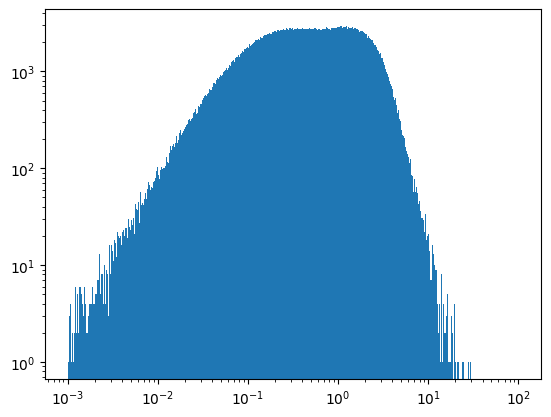

In [22]:
print(output)


plot_distr=output
# plot_distr=output[:,1]/(output[:,0])
output_noinf=output[output>1e3]
print(output_noinf)
print(output/(1+output))
plt.hist(plot_distr, bins=(np.logspace(-3, 2, 1000)))
plt.xscale('log')
plt.yscale('log')
print(max(plot_distr), min(plot_distr))
print(np.mean(plot_distr), np.std(plot_distr))

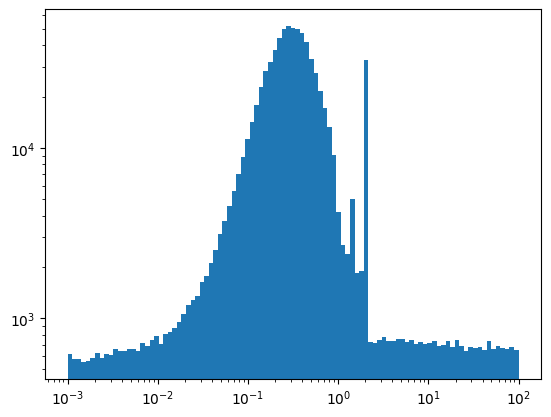

In [24]:
# plot col weights
plt.figure()
plt.hist(col['weight'], bins=(np.logspace(-3, 2, 100)))
plt.xscale('log')
plt.yscale('log')